/home/paaske/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


fit


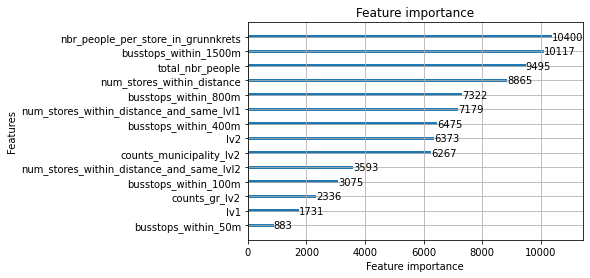

In [9]:
#Haakon
import lightgbm as lgb  # standard alias
from lightgbm import plot_importance
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import math
from catboost import CatBoostRegressor
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

train = pd.read_csv('../feature_engineering/train_set.csv')
test = pd.read_csv('../feature_engineering/test_set.csv')
#train_data = pd.read_csv('../data/stores_train.csv')


train['lv1'] = train['lv1'].astype(object)
test['lv1'] = test['lv1'].astype(object)

train['lv2'] = train['lv2'].astype(object)
test['lv2'] = test['lv2'].astype(object)

#mall as caategory
train['lv2'] = train['lv2'].astype(object)
test['lv2'] = test['lv2'].astype(object)

import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

y_train = train['revenue']
train = train.iloc[: , :-1]

# For working
# X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)

# For Kaggle
X_train = train
X_test = test

# Save store ids, then remove this column
store_ids = X_test['store_id'].to_numpy()
ids = pd.DataFrame(store_ids)
ids.rename(columns={0 :'id'}, inplace=True )

#X_train = X_train.drop('store_id', axis=1)
X_test = X_test.drop('store_id', axis=1)
#X_train = X_train.drop(columns=X_train.columns[0], axis=1)
#X_test = X_test.drop(columns=X_test.columns[0], axis=1)

#X_train = X_train.drop('grunnkrets_id', axis=1)
#X_test = X_test.drop('grunnkrets_id', axis=1)
X_test = X_test.drop('mall_dummy', axis=1)
#remove nan
X_train = X_train.fillna(0)

y_train = y_train.fillna(0)
X_test = X_test.fillna(0)


def lgbm():
#Hyper parameters
    hyper_params = {
        'task': 'train',
        #'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': ['rmse'],
        'learning_rate': 0.005,
        "max_depth": 8,
        "num_leaves": 128,  
        "num_iterations": 1000
    }

    #fit the model takes some time
    gbm = lgb.LGBMRegressor(**hyper_params)
    gbm.fit(X_train, y_train)
    lgb.plot_importance(
        gbm
    )
    print("fit")
    #predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
    y_pred = np.expm1(y_pred)

    

    #generate csv file of id and prediction
    predicted = pd.DataFrame(y_pred, columns = ['predicted'])
    output = pd.concat([ids,predicted],axis=1)
    output.to_csv('lgbm.csv',index=False)



def catboost():
    model = CatBoostRegressor(iterations=1000,
                            learning_rate=0.005,
                            depth=12,
                            loss_function= 'RMSE')
    # Fit model
    model.fit(X_train, y_train)
    # Get predictions
    preds = model.predict(X_test)
    preds = np.expm1(preds)

    #generate csv file of id and prediction
    predicted = pd.DataFrame(preds, columns = ['predicted'])
    output = pd.concat([ids,predicted],axis=1)
    output.to_csv('cat.csv',index=False)

lgbm()






In [3]:
import lightgbm as lgb  # standard alias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import math
from catboost import CatBoostRegressor
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
train = pd.read_csv('../no_nan_train.csv')
test = pd.read_csv('../no_nan_test.csv')

x_test = test
x_train = train.drop('revenue', axis=1)
y_train = train['revenue']

#X_train, X_test, y_train, y_test = train_test_split(train, train['revenue'], test_size=0.2, random_state=42)

def cat():
    model = CatBoostRegressor(iterations=1000,
                                learning_rate=0.005,
                                depth=12,
                                loss_function= 'RMSE')
    # Fit model
    model.fit(x_train, y_train)
    # Get predictions
    preds = model.predict(x_test)
    preds = np.expm1(preds)
    predicted = pd.DataFrame(preds, columns = ['predicted'])

    output = pd.concat([ids,predicted],axis=1)
    output.to_csv('lgbm.csv',index=False)
    df = pd.read_csv('output_for_submission.csv')
    df['predicted'] = df['predicted'].shift(-1)
    df.to_csv('shifted.csv',index=False)


FileNotFoundError: [Errno 2] No such file or directory: '../no_nan_train.csv'

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt

#Hyper parameters
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000
}

#fit the model takes some time
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train)
print("fit")
#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred = np.expm1(y_pred)

#generate csv file of id and prediction
predicted = pd.DataFrame(y_pred, columns = ['predicted'])
output = pd.concat([ids,predicted],axis=1)
output.to_csv('lgbm.csv',index=False)
df = pd.read_csv('output_for_submission.csv')
df['predicted'] = df['predicted'].shift(-1)
df.to_csv('shifted.csv',index=False)



In [ ]:
import pandas as pd
from verstack import LGBMTuner
# import the data
train = pd.read_csv('../data/modified_data.csv')
test = pd.read_csv('../data/modified_test_data.csv')
test = test.drop('store_id', axis = 1)
X = train.drop('revenue', axis = 1)
X = X.drop('store_id', axis = 1)
y = train['revenue']
X = X.fillna(0)
y = y.fillna(0)
print(X.isnull().values.any())
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'rmsle') # <- the only required argument
tuner.fit(X, y)
# check the optimization log in the console.
pred = tuner.predict(test)